<h1><center> 
    Accceptance/Rejection Method </center> </h1>

### Thanoj Muddana

### Exercise 1: Proof of the A/R Method for the discrete case

**Write-up Only** We saw a proof in the continuous case that, if we sample values y from density function $g_Y(Y)$ on the support of X and accept the sample values with probability  $\frac{f_X(y)}{cg_Y(y)}$, then result would be a sample from the target density $f_X(y)$. Please prove this in the discrete case IN YOUR OWN WORDS (we might get to this in class so I want you to write it in your own words, because it will help settle the ideas in your brain.) The discrete case is very similar to the continuous one, and it is good to take the opportunity to study the continuous-case proof carefully.)

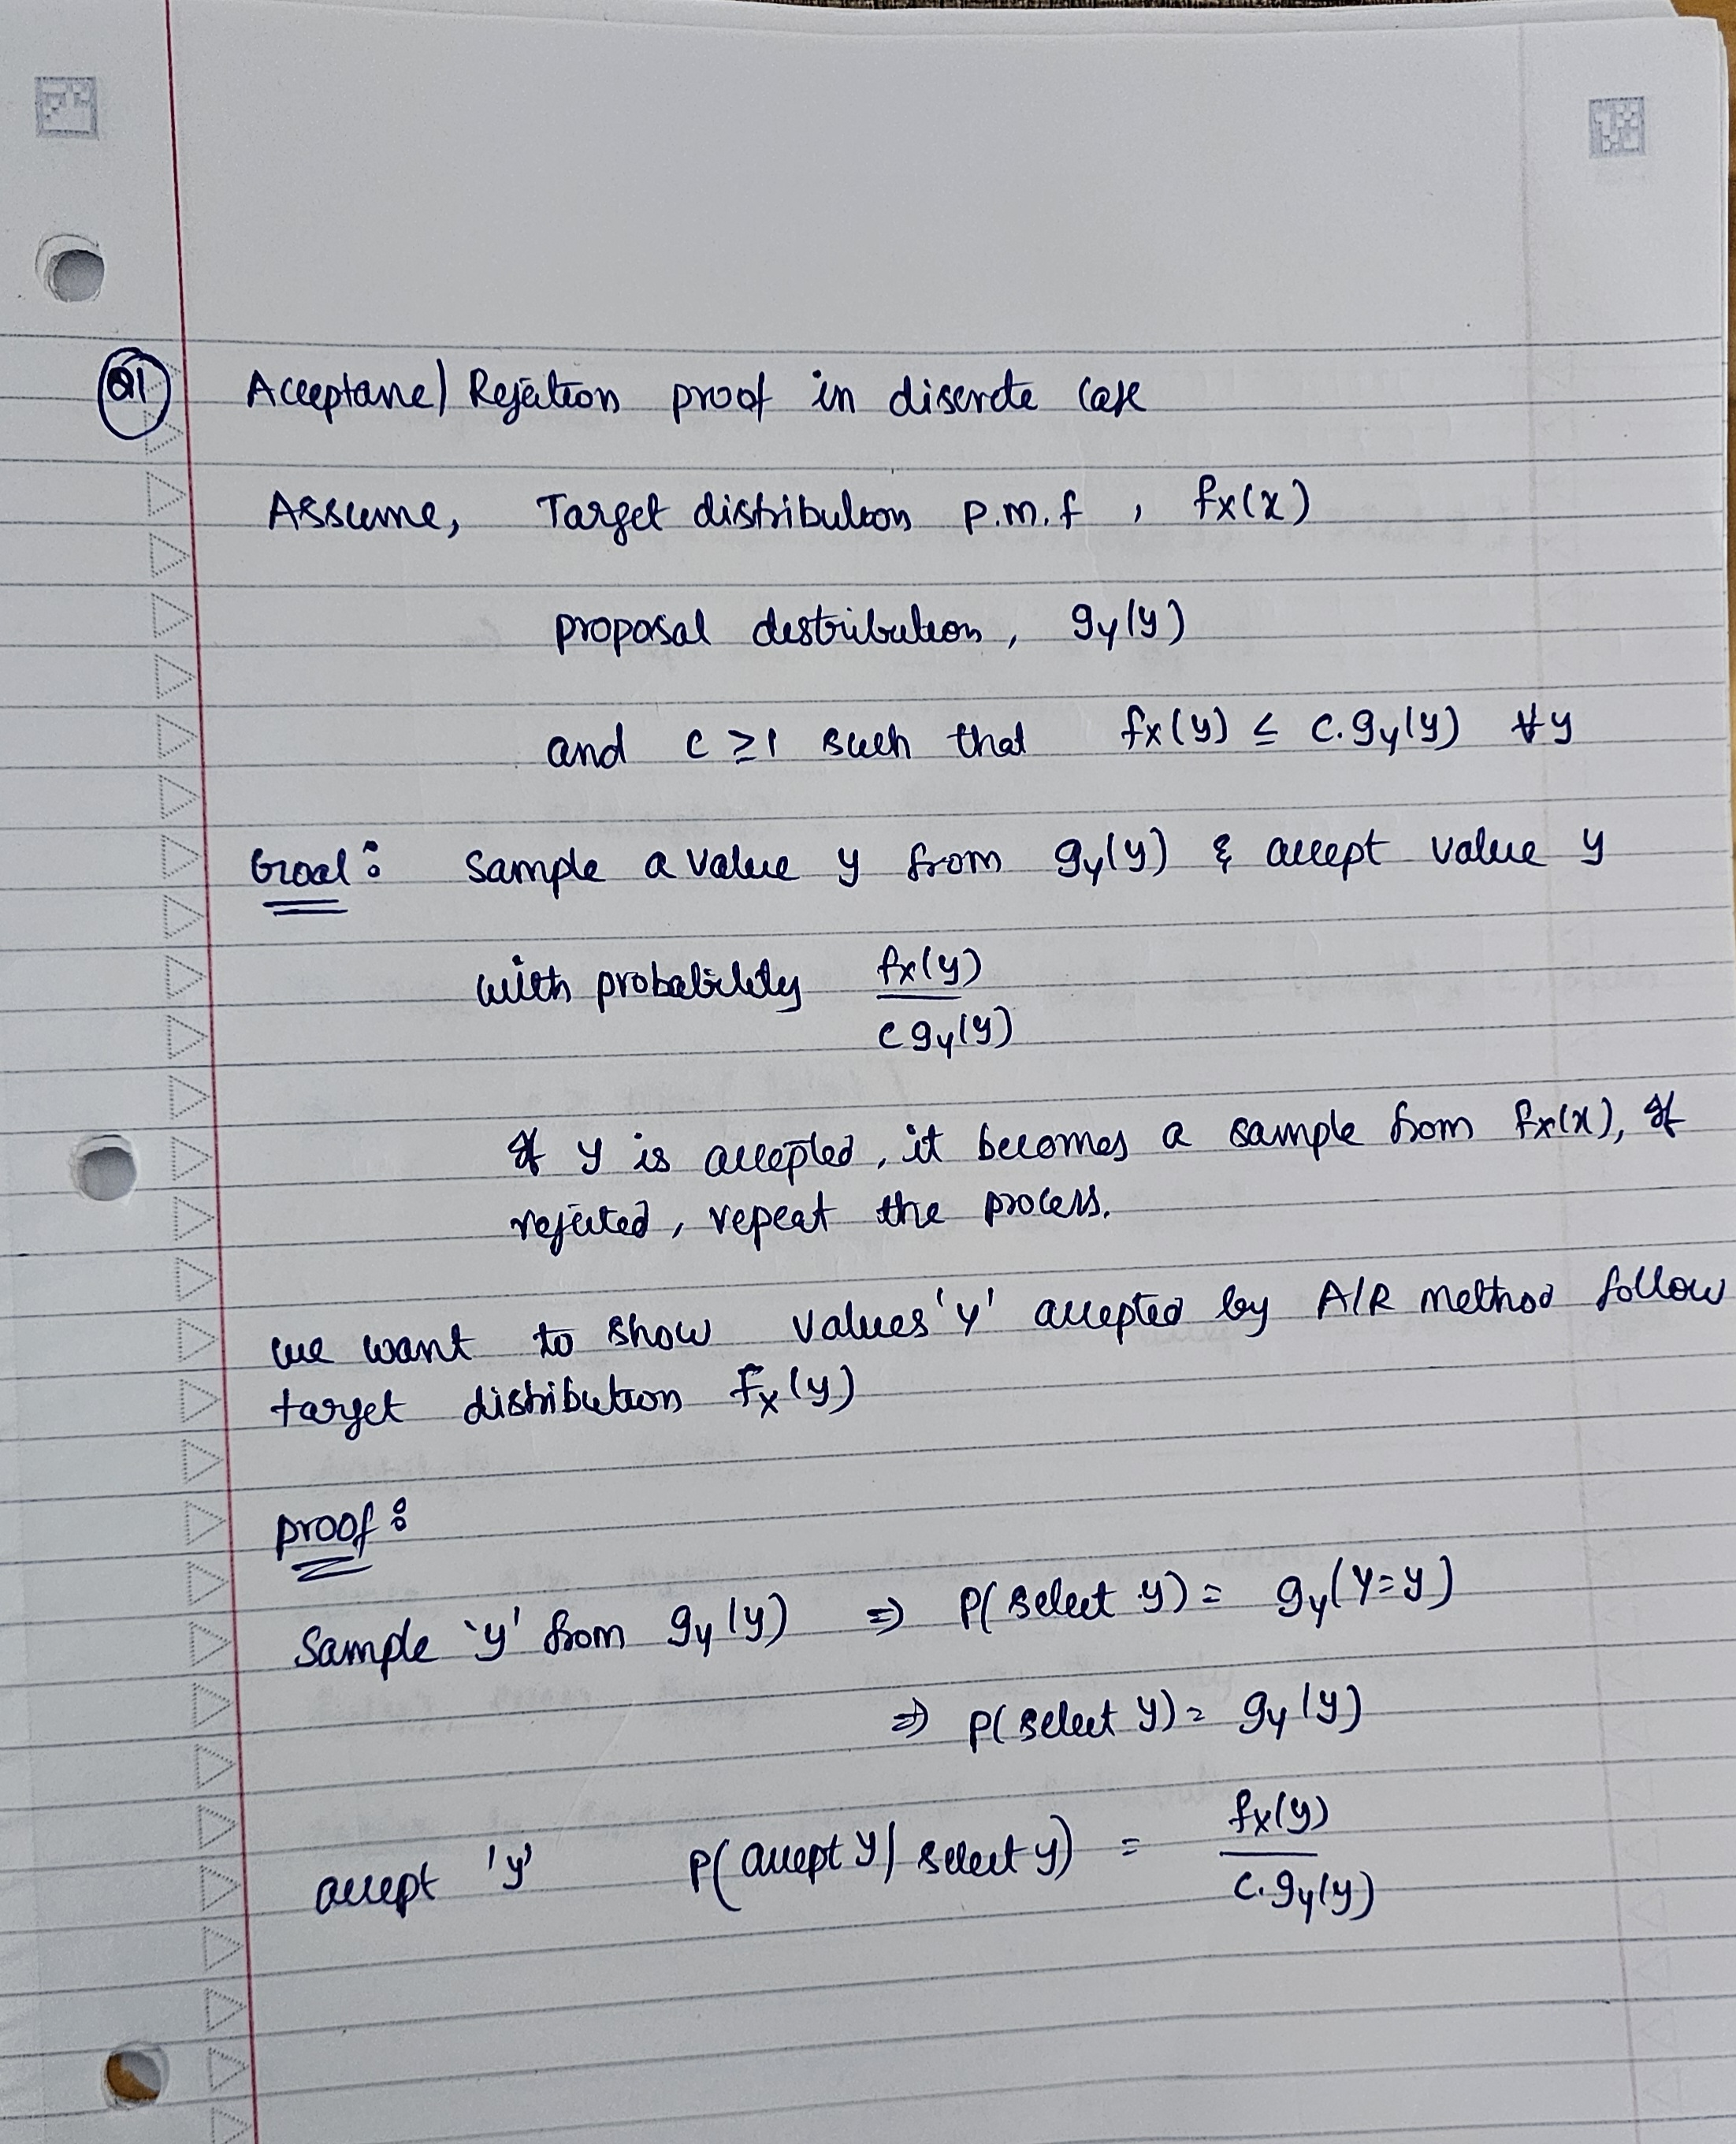

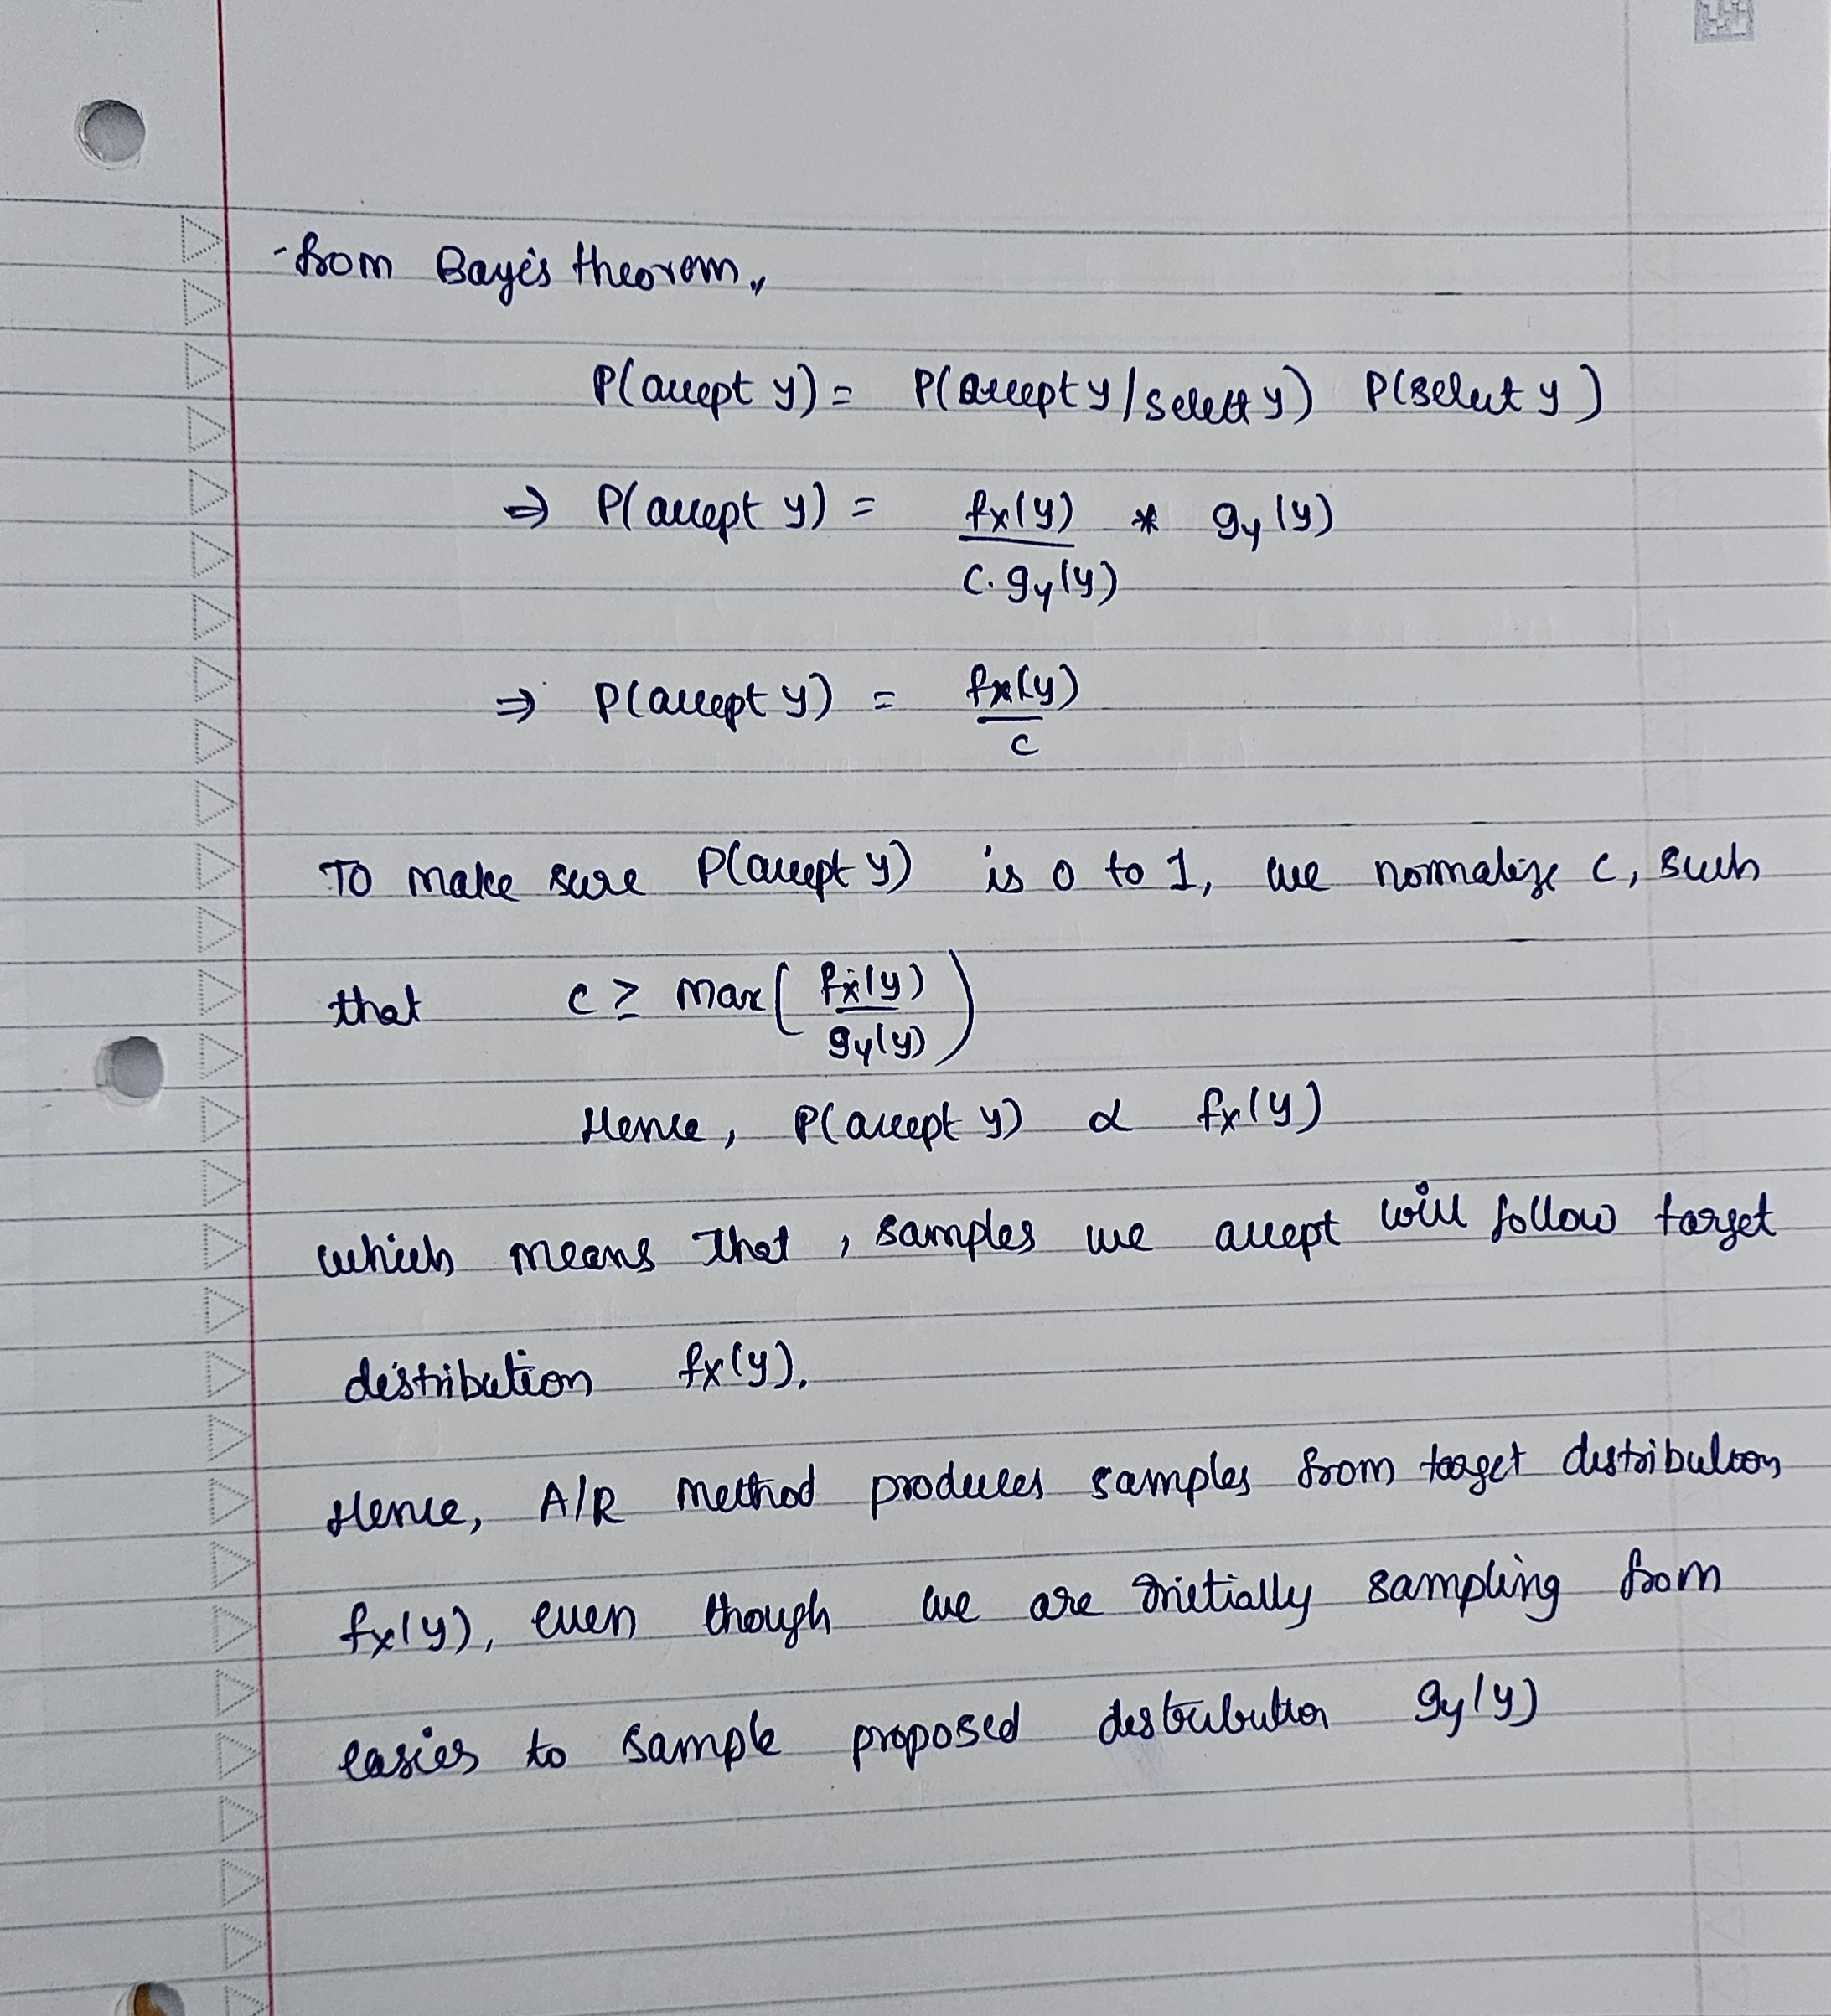

### Exercise 2: A/R for a ball

The A/R method can be used to draw points from geometric shapes.

#### a) **Explain in Video.** 200 points from a circle
Please implement the A/R method to draw 200 points uniformly from a circle.

As part of your code, please also keep count of the number of iterations you have to go through in total in order to make 200 successful draws and output this number at the end.

Also, plot the points to make sure they look like they are drawn from a circle, including the inside of the circle!

#### b) **Explain in Video.** 200 points from a 3-D ball
Please also implement the A/R method to draw 200 points uniformly from a ball in 3 dimensions.

As part of your code, please also keep count of the number of iterations you have to go through in total in order to make 200 successful draws and output this number at the end.

Hint: To check that the points really are drawn from a 3-D ball, please make sure that when you plot the following three test data sets:

    test1 <- YourMatrixOfRandomlySampledDirections[,1:2]
    test2 <- YourMatrixOfRandomlySampledDirections[,c(1,3)]
    test3 <- YourMatrixOfRandomlySampledDirections[,2:3]

that each returns a plot of a circle.


You may want to look at what `par(mfrow=c(2,2))` does. (But remember to set your plot back to `par(mfrow=c(1,1))` afterwards.)

#### c) **Write-up Only.** What do you notice about the number of draws you need to create a d-sphere as d increased from 2 to 3?

Total iterations to get 200 draws from Uniform Circle: 249 


Warning message in symbols(0, 0, circles = 1, add = TRUE, inches = FALSE, border = "red"):
“"border" is not a graphical parameter”


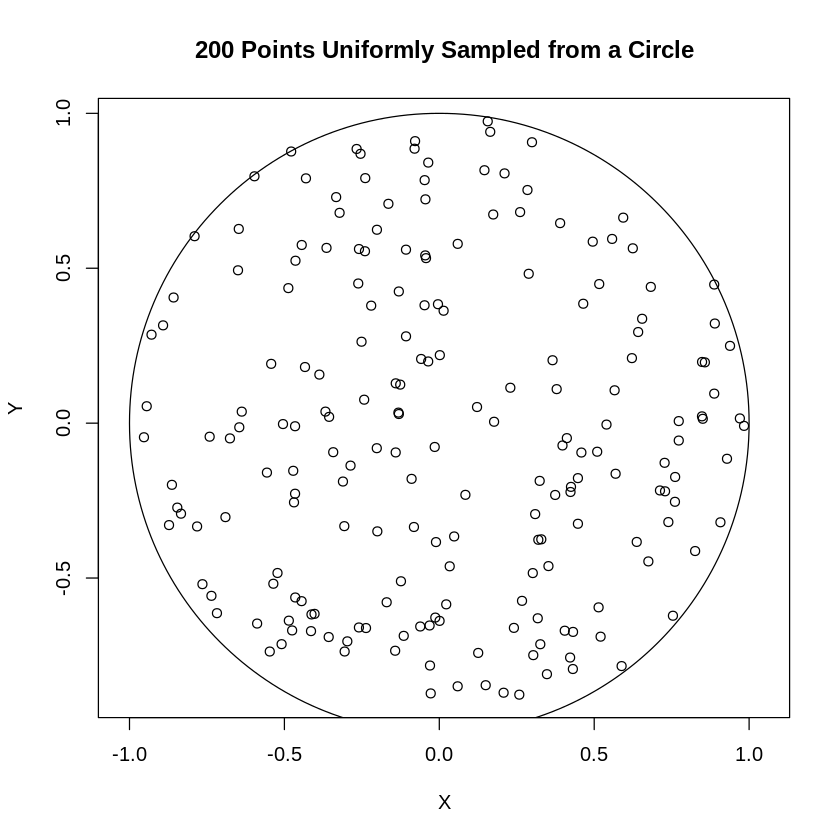

In [1]:
# Target distribution pi(x, y): Uniform distribution inside the unit circle
# Proposal distribution g(x, y):Sample from X [-1, 1], Y[-1, 1]

set.seed(1)
#Circle
#Parameters settings
draws <- 200
accepted_draws <- 0
total_draws <- 0
accepted_points <- matrix(ncol=2, nrow=draws)


# Acceptance-Rejection Method
while (accepted_draws < draws) {
  # sampling a point from proposal distribution
  x <- runif(1, -1, 1)
  y <- runif(1, -1, 1)
  # Acceptance criterion
  if (x^2 + y^2 <= 1) {
    accepted_draws <- accepted_draws + 1
    accepted_points[accepted_draws, ] <- c(x, y)
  }
  total_draws <- total_draws + 1
}

cat("Total iterations to get 200 draws from Uniform Circle:", total_draws, "\n")

# Plot
plot(accepted_points, xlab="X", ylab="Y", main="200 Points Uniformly Sampled from a Circle", asp=1)
symbols(0, 0, circles=1, add=TRUE, inches=FALSE, border="red")

Total iterations to get 200 draws from Uniform 3D Ball: 376 


Warning message in symbols(0, 0, circles = 1, add = TRUE, inches = FALSE, border = "red"):
“"border" is not a graphical parameter”
Warning message in symbols(0, 0, circles = 1, add = TRUE, inches = FALSE, border = "blue"):
“"border" is not a graphical parameter”
Warning message in symbols(0, 0, circles = 1, add = TRUE, inches = FALSE, border = "green"):
“"border" is not a graphical parameter”


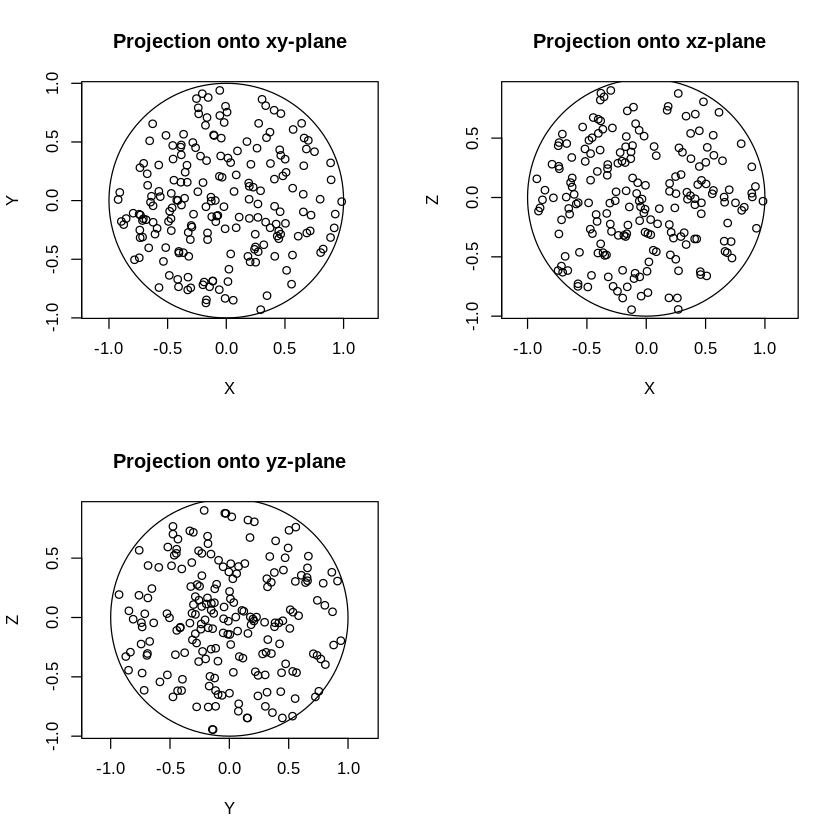

In [2]:
# 3D Ball
# Target distribution pi(x, y, z): Uniform distribution inside the unit ball
# Proposal distribution g(x, y, z): Sample from X[-1, 1], Y[-1, 1], Z[-1, 1]
set.seed(1)
# Parameters settings
draws <- 200
accepted_draws <- 0
total_draws <- 0
accepted_points <- matrix(ncol=3, nrow=draws)

# Acceptance-Rejection Method
while (accepted_draws < draws) {
  # sampling a point from proposal distribution
  x <- runif(1, -1, 1)
  y <- runif(1, -1, 1)
  z <- runif(1, -1, 1)

  # Acceptance criterion
  if (x^2 + y^2 + z^2 <= 1) {
    accepted_draws <- accepted_draws + 1
    accepted_points[accepted_draws, ] <- c(x, y, z)
  }
  total_draws <- total_draws + 1
}

cat("Total iterations to get 200 draws from Uniform 3D Ball:", total_draws, "\n")

par(mfrow=c(2, 2))  # 2x2 layout for subplots

# Plot x vs y (XY Plane)
plot(accepted_points[, 1], accepted_points[, 2], xlab="X", ylab="Y", main="Projection onto xy-plane", asp=1)
symbols(0, 0, circles=1, add=TRUE, inches=FALSE, border="red")  # Add the circle boundary

# Plot x vs z (XZ Plane)
plot(accepted_points[, 1], accepted_points[, 3], xlab="X", ylab="Z", main="Projection onto xz-plane", asp=1)
symbols(0, 0, circles=1, add=TRUE, inches=FALSE, border="blue")  # Add the circle boundary

# Plot y vs z (YZ Plane)
plot(accepted_points[, 2], accepted_points[, 3], xlab="Y", ylab="Z", main="Projection onto yz-plane", asp=1)
symbols(0, 0, circles=1, add=TRUE, inches=FALSE, border="green")  # Add the circle boundary

par(mfrow=c(1, 1))  #reset graphical parameters

I've observed that number of draws required would increase when we try to sample from higher dimensions. for 2D shape, it required 249 iterations to get 200 draws from circle, whereas for 3D Ball, it required 376 iterations to get 200 draws.

### Exercise 3

**Explain in Video**   Use an appropriate method introduced in class to draw 10,000 rvs from this target distribution:

$$
\pi(x) = \frac{3}{4}(1-x^2), \text{ for } |x| \leq 1
$$

Also, make a histogram density estimate with the actual target $\pi(x)$ drawn over it for comparison.  Also calculate the ratio of acceptances to total number of draws. As always, any math and other statistical reasonin used should be explained!


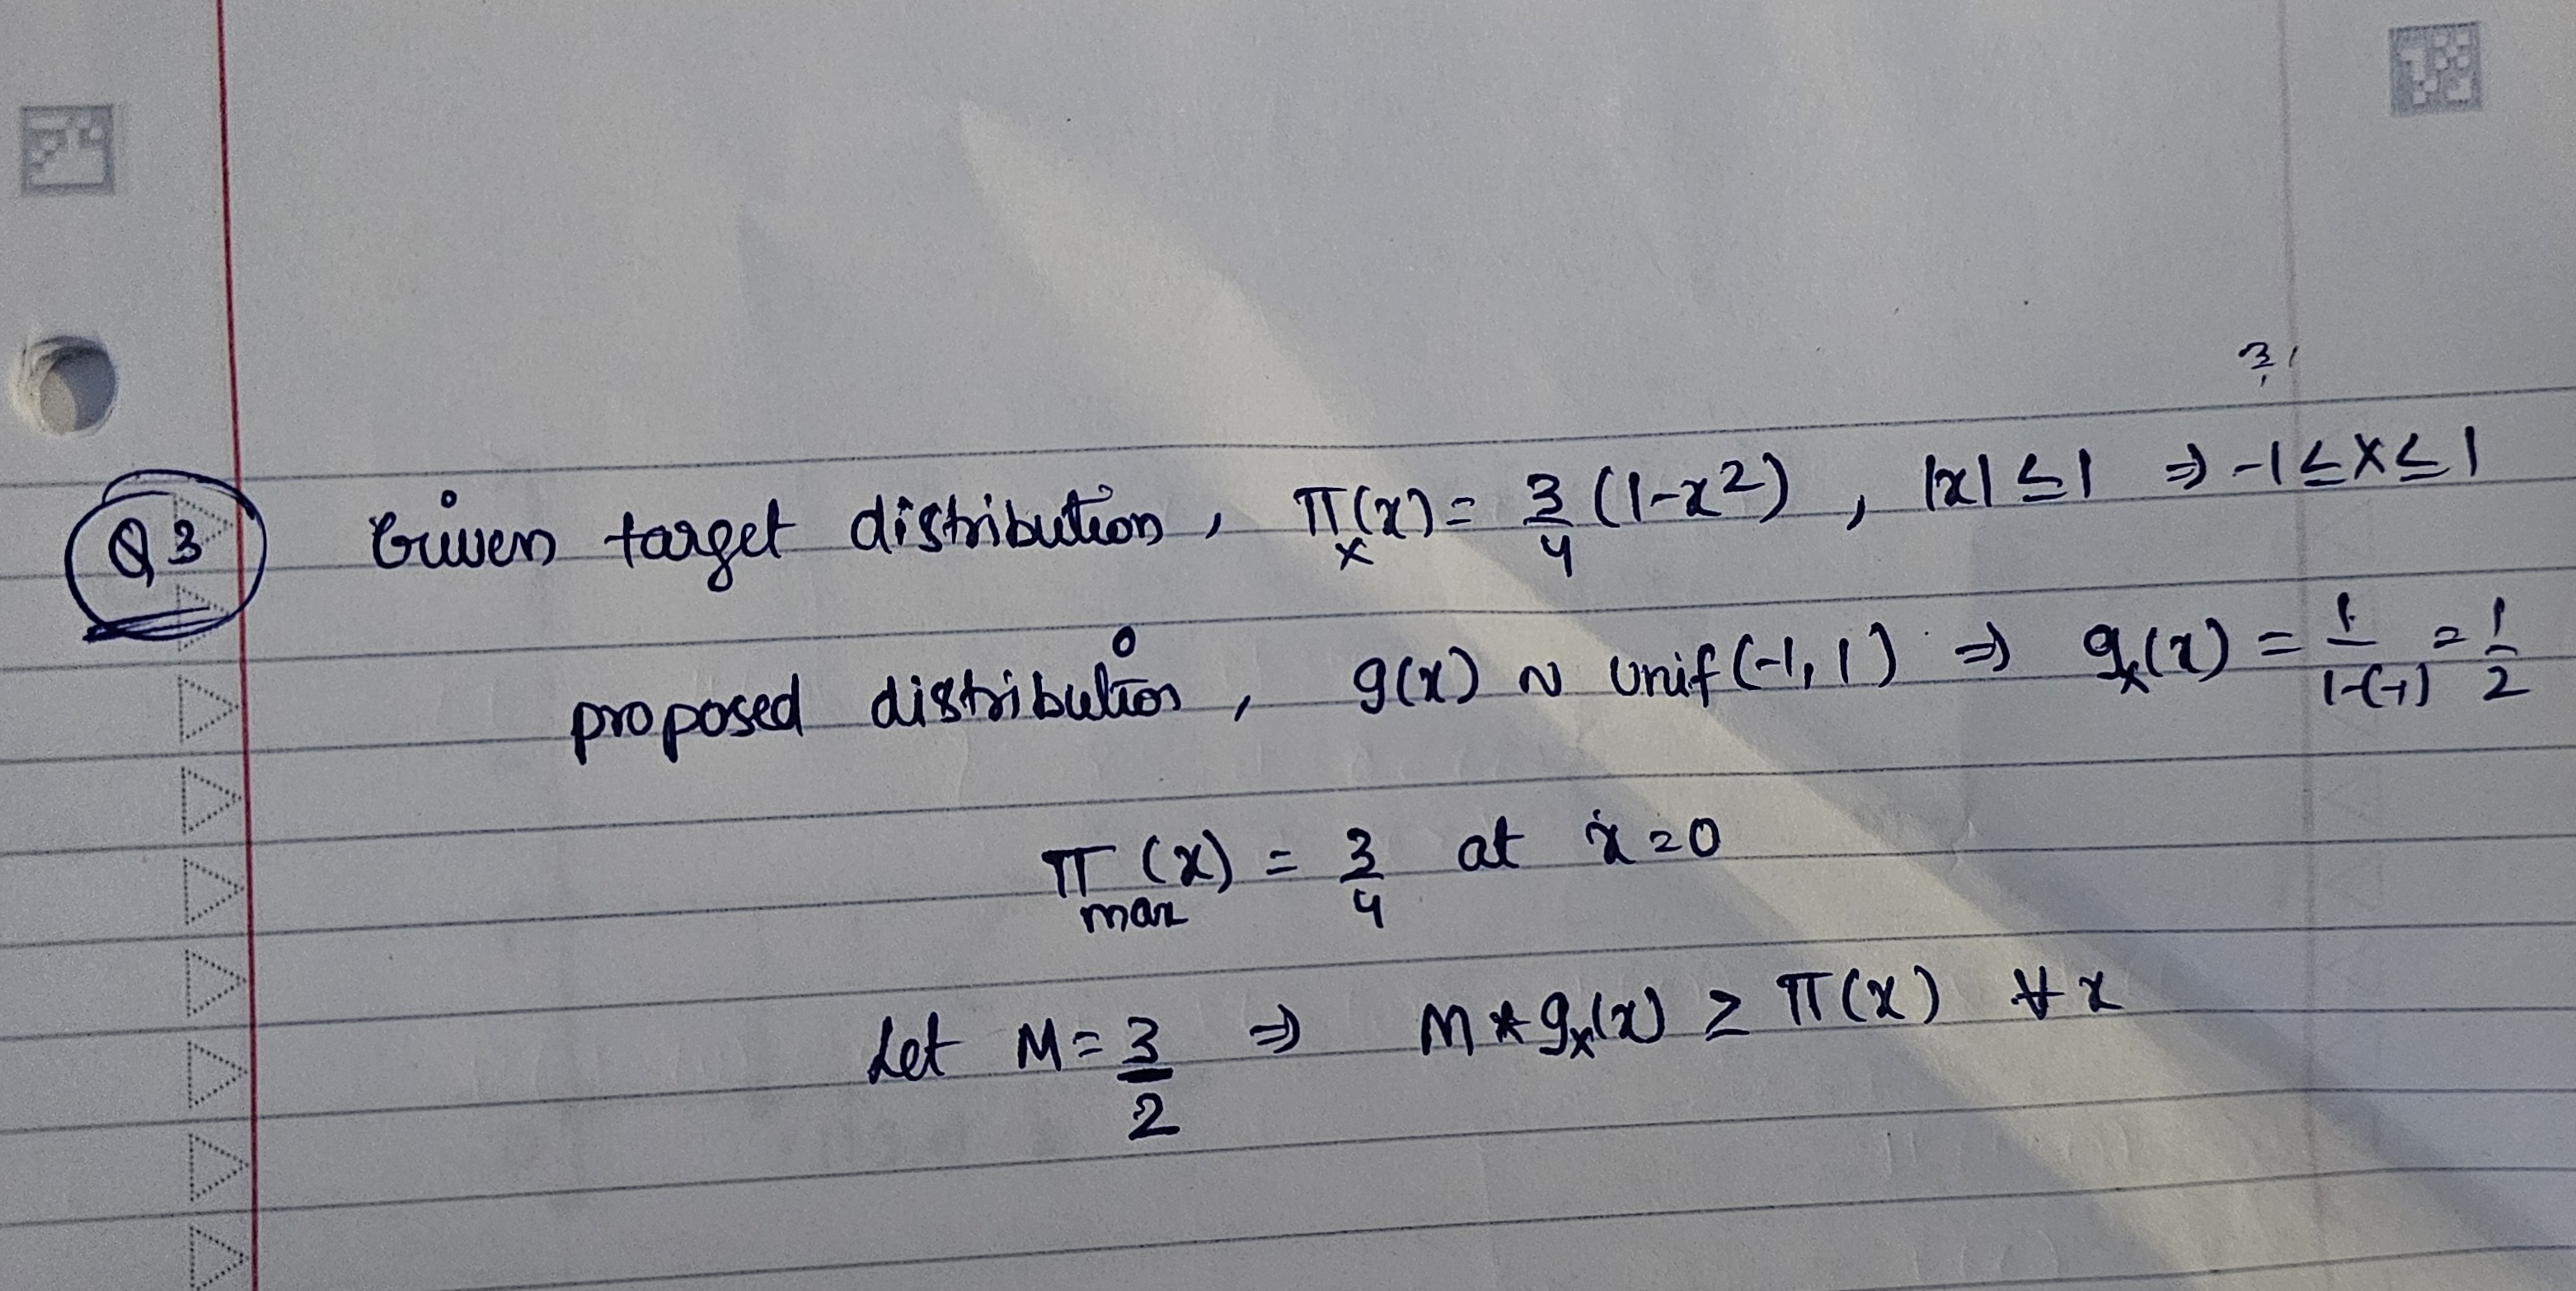

Acceptance Ratio: 0.6629981 


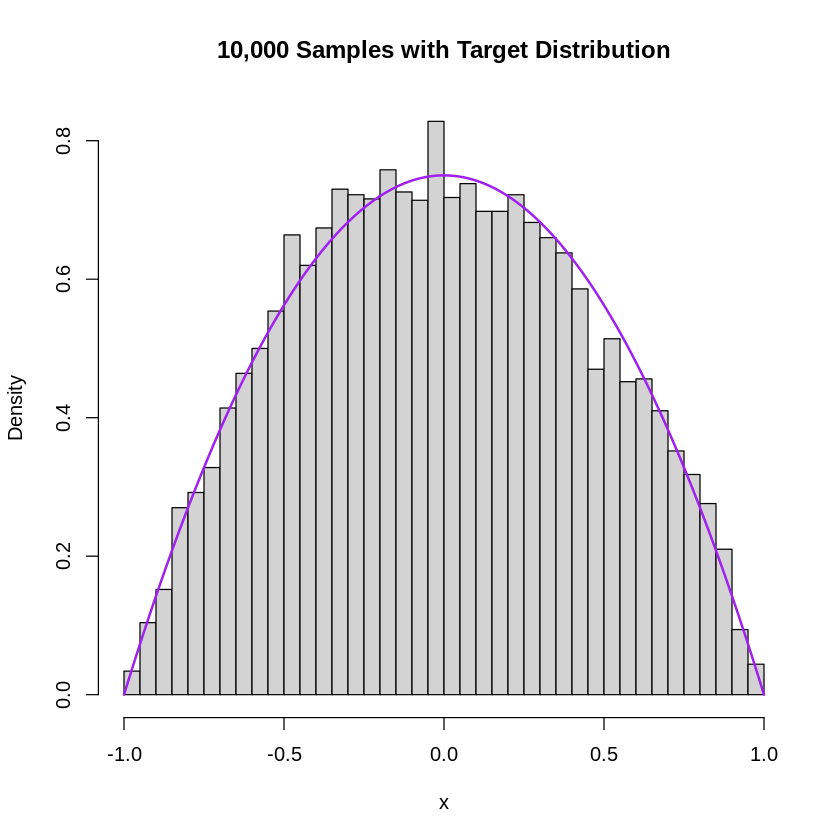

In [3]:
# Target distribution pi(x): Uniform distribution on [-1, 1], pi(x) = (3/4)(1 - x^2)
# Proposal distribution g(x): Uniformly sample from X ~ Uniform(-1, 1)
set.seed(1)

# Parameters settings
n_draws <- 10000
accepted_draws <- 0
total_draws <- 0
M <- 3/2
accepted_points <- numeric(n_draws)

# Acceptance-Rejection Method
while (accepted_draws < n_draws) {
  # sampling a point from proposal distribution (Uniform(-1, 1))
  x <- runif(1, -1, 1)

  # Evaluate the target and proposal distributions
  pi_x <- (3/4) * (1 - x^2)
  g_x <- 1/2

  # Acceptance criterion <= pi(x) / (M * g(x))
  u <- runif(1, 0, 1)
  if (u <= pi_x / (M * g_x)) {
    accepted_draws <- accepted_draws + 1
    accepted_points[accepted_draws] <- x
  }
  total_draws <- total_draws + 1
}

acceptance_ratio <- accepted_draws / total_draws
cat("Acceptance Ratio:", acceptance_ratio, "\n")

#plot
hist(accepted_points, probability=TRUE, breaks=50, main="10,000 Samples with Target Distribution", xlab="x")
curve((3/4) * (1 - x^2), from=-1, to=1, col="purple", add=TRUE, lwd=2)


### Exercise 4:  Sample from Trapezoid

Recall the question from class where we have five students sitting at the coordinates:

(0.1, 0.8), (0.2, 0.9), (0.4, 0.3), (0.5, 0.5), (0.6, 0.7)

![image-3.png](attachment:image-3.png)

Now imagine that the room is a trapezoidal classroom where the four corners are at the points
(0,0), (0,1), (2,1), and (1.3, 0). The main idea here is to figure out how to sample from this irregularly shaped room.


 a) **Explain in Video** Similar to HW2, using simulation, please approximate the p-value that we would see data as extreme as this data (two-sided test using the same distance statistic as before) if the students really were sitting randomly, independently uniformly around the classroom. Make sure you justify which direction you use when for the inequality to get the pvalue.

 Hint: there might be other ways to generate this, but if you do what I did, then your first randomly generated statistic should be `7.71213031970951`.

b) **Explain in Video**  Then answer: what is your conclusion about how students sat in class? Use hypothesis testing at the $\alpha=.05$ level.


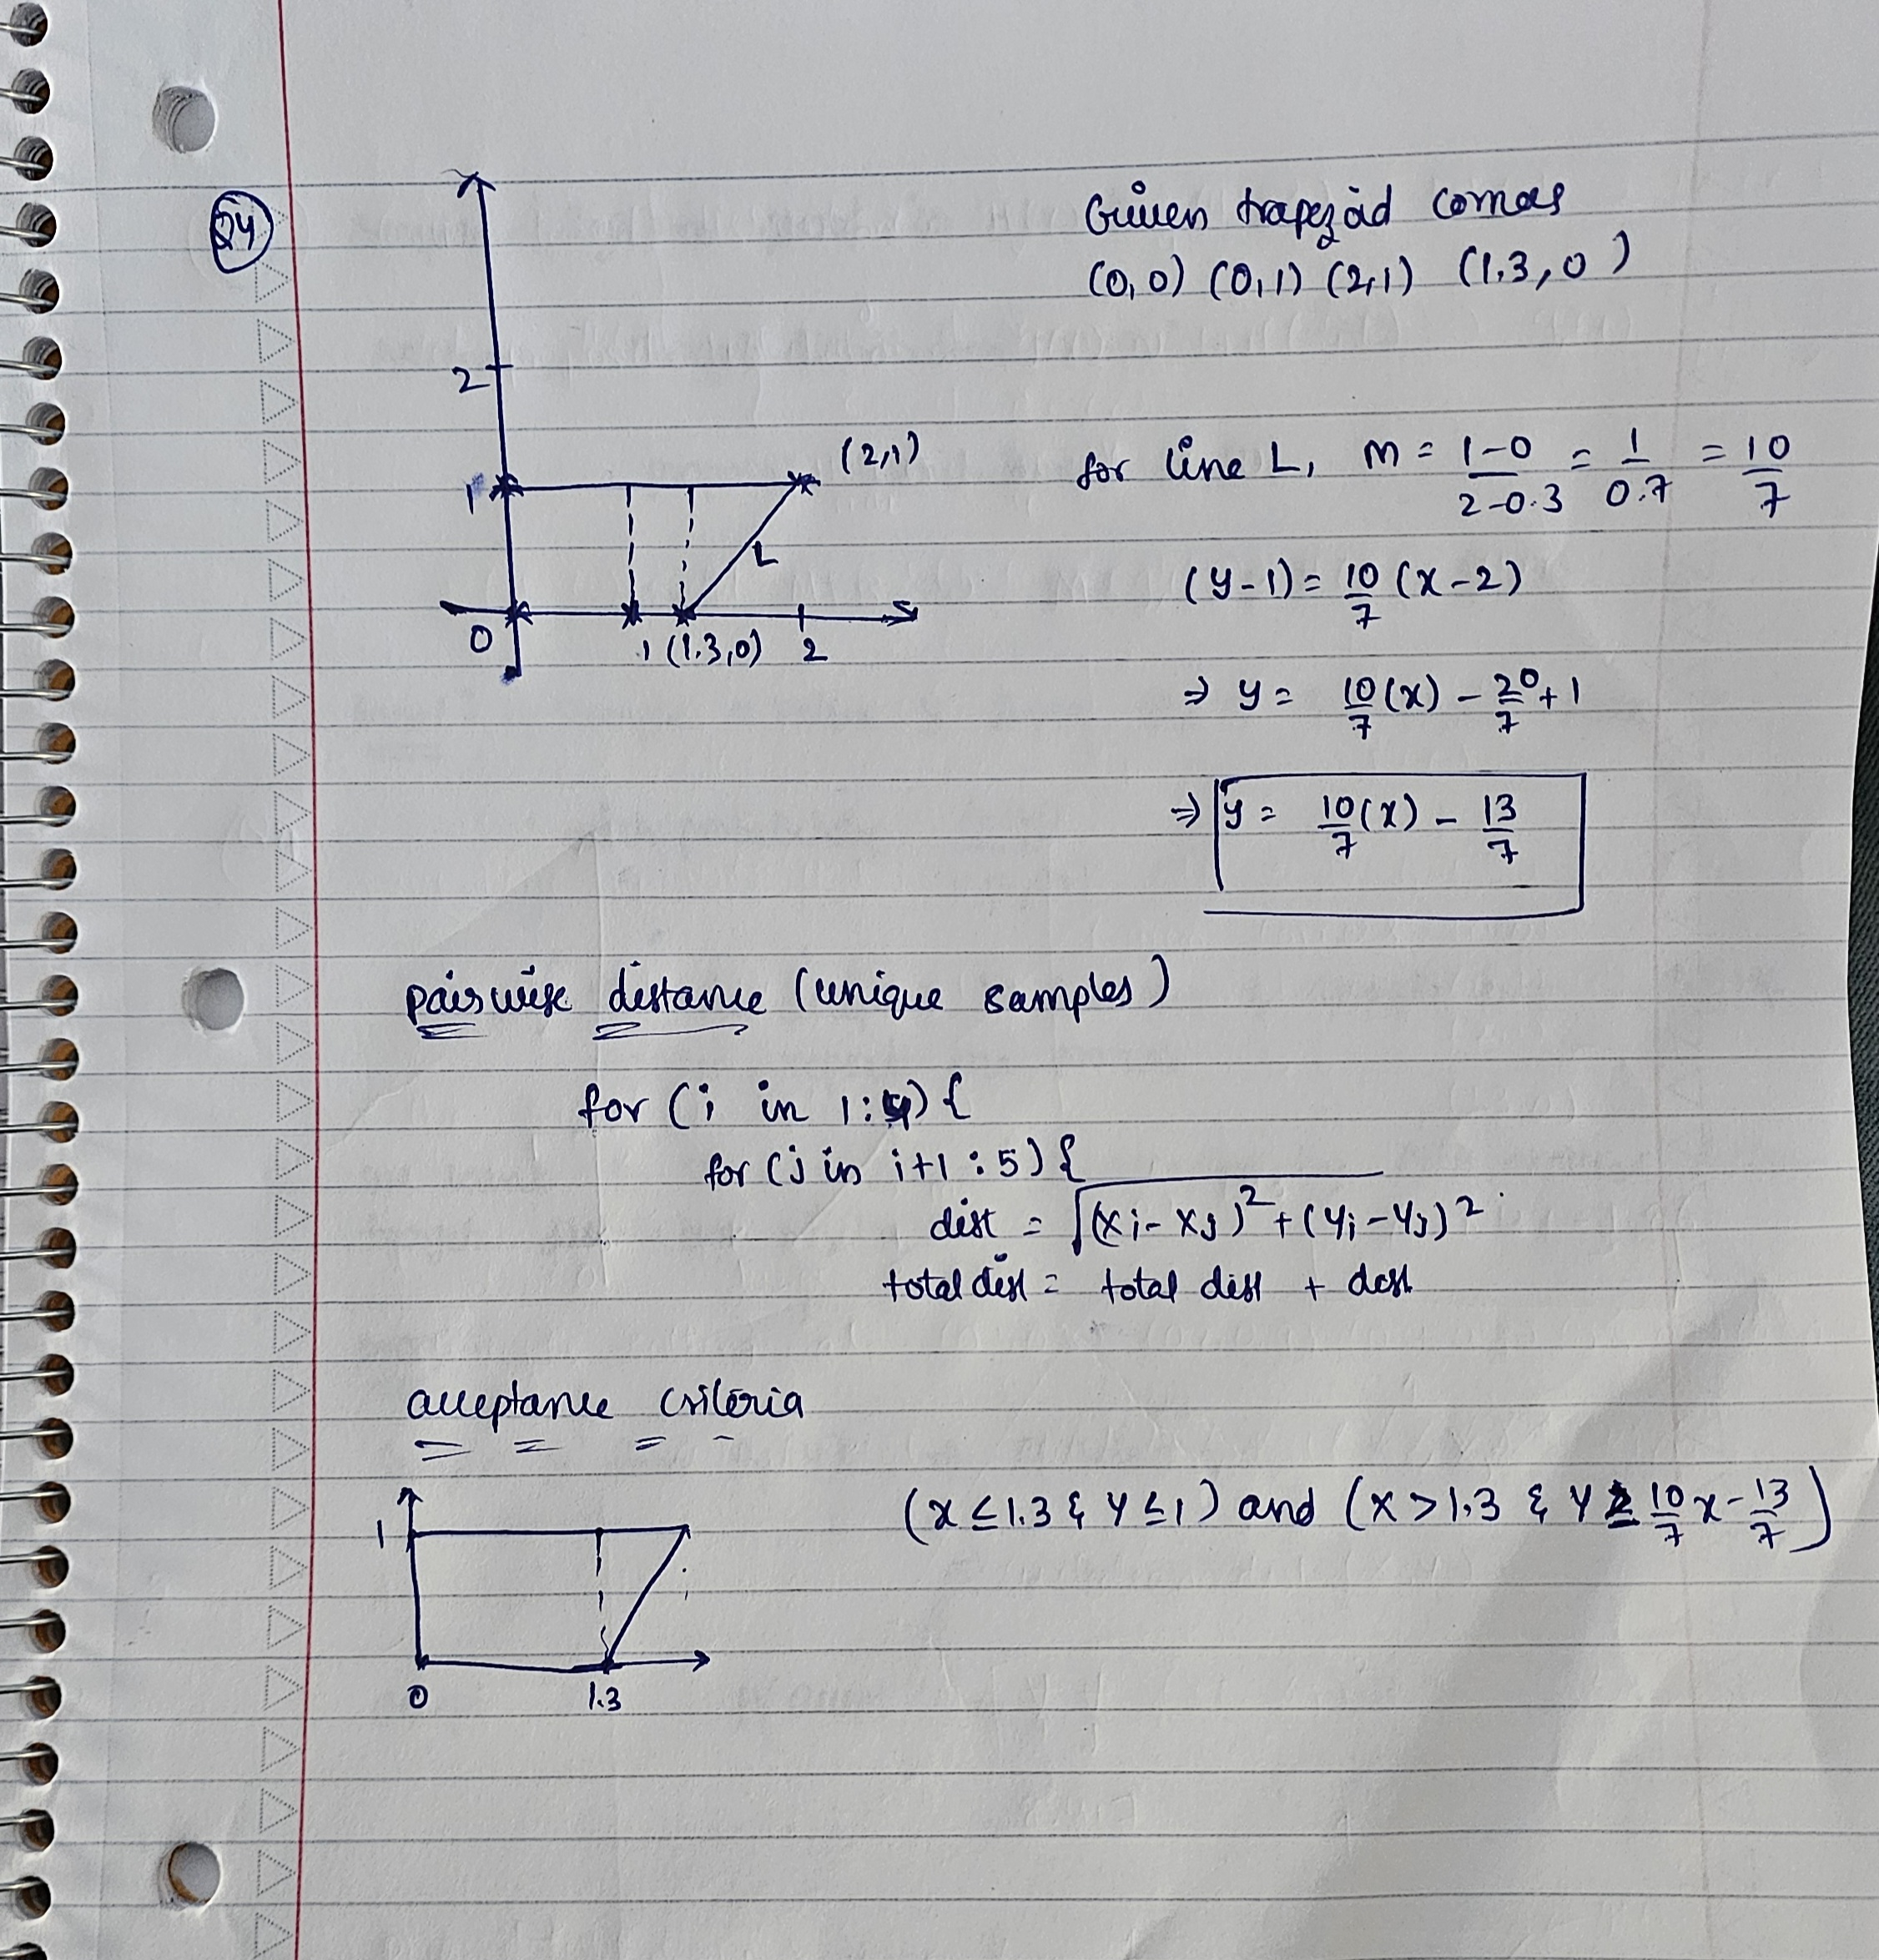

[1] "Actual Distance: 4.20851481561467"
[1] "Mean Pairwise Distance: 7.14983192440778"
[1] "Right-tail p-value: 0.974"
[1] "Left-tail p-value: 0.026"
[1] "Two-sided p-value: 0.052"


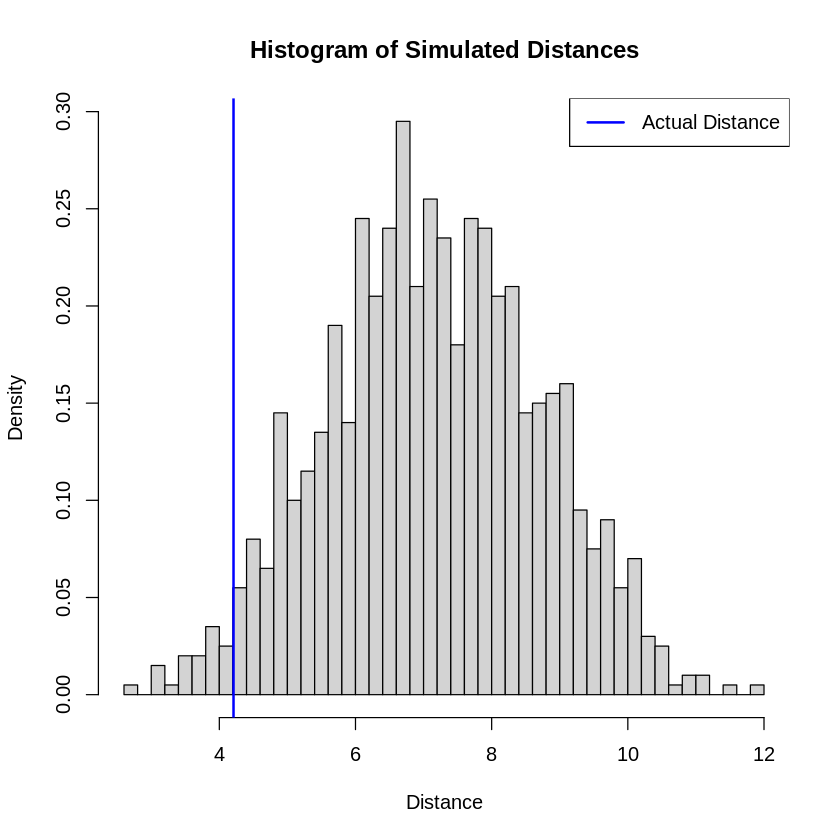

In [4]:
set.seed(1)

# Trapezoid corners
trapezoid_coords <- matrix(c(0, 0,
                             0, 1,
                             2, 1,
                             1.3, 0),
                           ncol = 2, byrow = TRUE)

# Given student sitting coordinates
x_coords <- c(0.1, 0.2, 0.4, 0.5, 0.6)
y_coords <- c(0.8, 0.9, 0.3, 0.5, 0.7)

student_pairs <- length(x_coords)

#compute pairwise distances (unique pairs only)
point_distances <- function(x_sample, y_sample) {
  e_dist <- 0
  for (i in 1:(length(x_sample)-1)) {
    for (j in (i+1):length(y_sample)) {
      e_dist <- e_dist + sqrt((x_sample[i] - x_sample[j])^2 + (y_sample[i] - y_sample[j])^2)
    }
  }
  return(e_dist)
}

#actual distance
actual_dist <- point_distances(x_coords, y_coords)

# Function to sample uniformly from the trapezoid
sample_from_trapezoid <- function(n) {
                        points <- matrix(NA, nrow = n, ncol = 2)
                        for (i in 1:n) {
                            while (TRUE) {
                              x <- runif(1, 0, 2)
                              y <- runif(1, 0, 1)

                              #acceptance criterion
                              if ((y <= 1 && x <= 1.3) || (x > 1.3 && y >= (10/7) * x - (13/7))) {
                                points[i, ] <- c(x, y)
                                break
                              }
                            }
                          }
                          return(points)
                        }

# Simulation settings
simulations <- 1000
e_dist_vec <- rep(NA, simulations)

# Run simulations
for (run in 1:simulations) {
  sample_points <- sample_from_trapezoid(student_pairs)
  x_sample <- sample_points[, 1]
  y_sample <- sample_points[, 2]
  e_dist_vec[run] <- point_distances(x_sample, y_sample)
}

print(paste("Actual Distance:", actual_dist))
print(paste("Mean Pairwise Distance:", mean(e_dist_vec)))
# Calculate p-values for both tails
right_tail_p_value <- sum(e_dist_vec >= actual_dist) / simulations
left_tail_p_value <- sum(e_dist_vec <= actual_dist) / simulations

# Two-sided p-value: Multiply the smaller tail by 2
p_value <- 2 * min(right_tail_p_value, left_tail_p_value)

# Print the p-values
print(paste("Right-tail p-value:", right_tail_p_value))
print(paste("Left-tail p-value:", left_tail_p_value))
print(paste("Two-sided p-value:", p_value))

# Plot the histogram of simulated distances with the actual distance
hist(e_dist_vec, probability = TRUE, breaks = 50, main = "Histogram of Simulated Distances", xlab = "Distance")
abline(v = actual_dist, col = "blue", lwd = 2)
legend("topright", legend = "Actual Distance", col = "blue", lwd = 2)


Null Hypothesis (H0): Students are seated randomly and independently around the classroom.

Alternative Hypothesis (HA): The students' seating arrangement is not random.

test statistics= 4.209
p-value=0.052
alpha=0.05

As p-value > alpha, we  do not have enough evidence reject Null Hypothesis, so we retain null hypothesis. Hence, we do not have enough evidence to say that  students are not seated randomly.